<img style="float: left; height: 175px; width: 175px" src="../landlab_logo_picture.jpg"> <h3 style="margin: 117px 0 0 185px; font-weight: 300;">a toolkit for modeling earth surface processes</h3>

# Setting Boundary Conditions on the Perimeter of a Raster.

<hr>
<small> For instructions on how to run an interactive iPython notebook, click here: <a href="https://github.com/landlab/tutorials/blob/release/README.md">https://github.com/landlab/tutorials/blob/release/README.md</a></small><br>
<small>For more Landlab tutorials, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<hr>

### This tutorial illustrates how to modify the boundary conditions along the perimeter of a rectangular raster.

In [1]:
from landlab import RasterModelGrid, CLOSED_BOUNDARY, FIXED_GRADIENT_BOUNDARY, \
FIXED_VALUE_BOUNDARY
from landlab.plot.imshow import imshow_grid
import numpy as np
%matplotlib inline

- Instantiate a grid.

In [2]:
mg = RasterModelGrid((4, 4), 1.)

The node boundary condition options are:

- CORE_NODE (status value = 0; all operations are performed on a CORE_NODE)
- FIXED_VALUE_BOUNDARY (status value = 1; a boundary node with a fixed value)
- FIXED_GRADIENT_BOUNDARY (status value = 2; a boundary node with a fixed gradient)
- TRACKS_CELL_BOUNDARY (status value = 3; a boundary node that is wrap-around)
- CLOSED_BOUNDARY (status value = 4; closed boundary, or no flux can cross this node, or more accurately, can cross the faces around the node)

(Note that these options are designed for the convenience in writing Landlab applications, and  are not "automatically enforced" in internal Landlab functions. For example, if you add two node fields together, as in `my_field1 + my_field2`, *all* values will be added, not just core nodes; to take advantage of boundary coding, you would use a syntax like `my_field1[grid.core_nodes] + my_field2[grid.core_nodes]`.)

Check the status of boundaries immediately after instantiating the grid:

In [3]:
mg.status_at_node

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=uint8)

The default conditions are for the perimeter to be fixed value (status of 1) and the interior nodes to be core (status of 0).

This is a bit easier to see graphically.

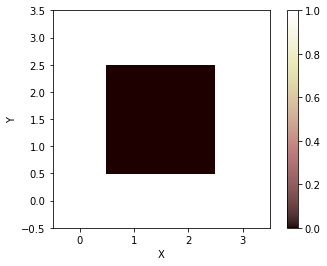

In [4]:
imshow_grid(mg, mg.status_at_node)

Now let's choose one node on the perimeter to be closed.  

Note that `imshow_grid` by default does not illustrate values for closed nodes, so we override that below and show them in blue.

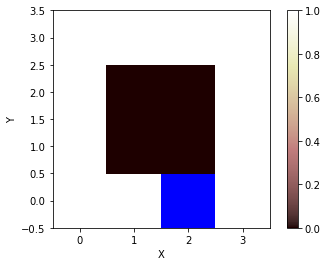

In [5]:
mg.status_at_node[2] = CLOSED_BOUNDARY
imshow_grid(mg, mg.status_at_node, color_for_closed='blue')

We could set the boundary condition at each node individually, or at groups of nodes (e.g. where the `x_of_node` value is greater than some specified value). But in many cases we just want to set the edges in one way or another. There are some functions for setting the boundary conditions around the perimeter of a raster.  (Remember that initially all of the perimeter nodes are FIXED_VALUE_BOUNDARY by default.)

A generic way to do this is to use **set_status_at_node_on_edges**.

Note that this method takes the node status for whether a boundary should be closed.  The order is **right, top, left, bottom**.

You could send it, for example, CLOSED_BOUNDARY, or 4, which is the value for CLOSED_BOUNDARY status.

Below we set the right and left edges as closed and the top and bottom as fixed_value.

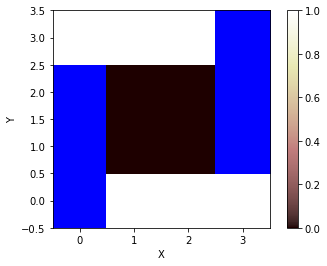

In [6]:
mg.set_status_at_node_on_edges(right=CLOSED_BOUNDARY, top=FIXED_VALUE_BOUNDARY, \
                               left=CLOSED_BOUNDARY, bottom=FIXED_VALUE_BOUNDARY)
#the same thing could be done as ...
#mg.set_status_at_node_on_edges(right=4, top=1, left=4, bottom=1)
imshow_grid(mg, mg.status_at_node, color_for_closed='blue')

There are multiple ways to set edge boundary conditions.  If above isn't intuitive to you, keep reading.

Now let's set the right and left edges as closed boundaries using **set_closed_boundaries_at_grid_edges.**

Note that this method takes boolean values for whether a boundary should be closed.  The order is 
**right, top, left, bottom**.

Note that here we instantiate a new grid.

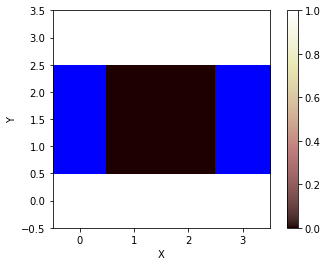

In [7]:
mg1 = RasterModelGrid((4, 4), 1.)
mg1.set_closed_boundaries_at_grid_edges(True, False, True, False)
imshow_grid(mg1, mg1.status_at_node, color_for_closed='blue')

Now let's try setting looped boundaries using **set_looped_bondaries.**

Note that this method takes boolean values for whether the top and bottom (first) or right and left (second) are looped.

We will set the top and bottom to be looped (status value of 3)

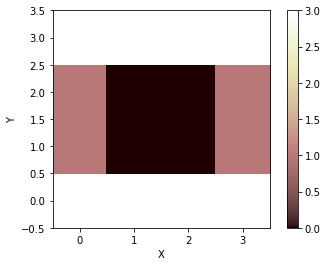

In [8]:
mg2 = RasterModelGrid((4, 4), 1.)
mg2.set_looped_boundaries(True, False)
imshow_grid(mg2, mg2.status_at_node)

Note that this has the right and left edges as FIXED_VALUE_BOUNDARY (status value of 1).  

We can change those to closed if we want.

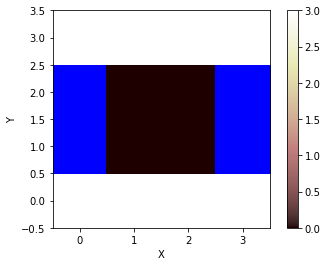

In [9]:
mg2.set_closed_boundaries_at_grid_edges(True, False, True, False)
imshow_grid(mg2, mg2.status_at_node, color_for_closed='Blue')

Note that there are not methods for setting FIXED_GRADIENT_BOUNDARY conditions on the boundary edges.  But we can do that.  We could use **set_status_at_node_on_edges**.  Below is another way to do this.

Remember that FIXED_GRADIENT_BOUNDARY has a status value of 2.
We will set the top and bottom to be fixed gradient.

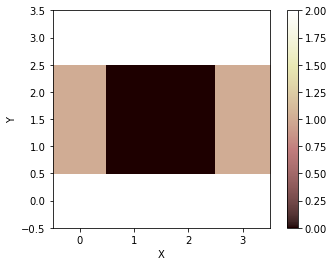

In [10]:
mg3 = RasterModelGrid((4, 4), 1.)
mg3.status_at_node[mg3.y_of_node == 0] = FIXED_GRADIENT_BOUNDARY
mg3.status_at_node[mg3.y_of_node == 3] = FIXED_GRADIENT_BOUNDARY
imshow_grid(mg3, mg3.status_at_node, color_for_closed='Blue')
#there are no closed boundaries so we didn't need the color_for_closed option, 
#but no problem if you accidentally include it!

### Click here for more <a href="https://github.com/landlab/landlab/wiki/Tutorials">Landlab tutorials</a>